<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371D Homework 0 (Prerequisites)

By Brian Du, Kenneth Marenco, and Zach Starr

## Some Plotting Code

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D    # Do not remove this import
from math import floor, ceil
import warnings


def cleanup_ticks(get_lim, set_ticks):
    lim = get_lim()
    lim = [ceil(lim[0]), floor(lim[1])]
    if lim[0] * lim[1] < 0:
        set_ticks([lim[0], 0, lim[1]])
    else:
        set_ticks([lim[0], lim[1]])

In [2]:
def plot_slices(function, eigenvectors, ax, variable_range=(-1, 1), samples=101):
    # We want division by zero to raise an exception, so we can print our own warning and abort
    with warnings.catch_warnings():
        warnings.simplefilter("error")
        try:
            for i in range(2):
                eigenvectors[i] /= np.linalg.norm(eigenvectors[i])
        except RuntimeWarning:
            print('Zero-norm eigenvector(s). No plot produced')
        else:
            t = np.linspace(variable_range[0], variable_range[1], num=samples)
            for plot in range(2):
                x, y = (eigenvectors[plot][component] * t for component in range(2))
                ax.plot(t, function(x, y), label='Along v_{}'.format(plot + 1))
            cleanup_ticks(ax.get_xlim, plt.xticks)
            cleanup_ticks(ax.get_ylim, plt.yticks)
            plt.legend()
            plt.xlabel('t')

In [3]:
def plot_function(function, ax, variable_range=(-1, 1), samples=101):
    t = np.linspace(variable_range[0], variable_range[1], num=samples)
    x, y = np.meshgrid(t, t)
    ax.plot_surface(x, y, function(x, y), cmap=plt.get_cmap('viridis'))
    cleanup_ticks(ax.get_xlim, ax.set_xticks)
    cleanup_ticks(ax.get_ylim, ax.set_yticks)
    cleanup_ticks(ax.get_zlim, ax.set_zticks)
    plt.xlabel('x')
    plt.ylabel('y')

In [4]:
def plot_both(name, function, eigenvectors, fig, variable_range=(-1, 1), samples=101):
    subplot_1 = fig.add_subplot(1, 2, 1, projection='3d')
    plot_function(function, subplot_1, variable_range=variable_range, samples=samples)
    subplot_2 = fig.add_subplot(1, 2, 2)
    plot_slices(function, eigenvectors, subplot_2, variable_range=variable_range,
                samples=samples)
    fig.suptitle('{}(x, y)'.format(name))

In [5]:
def answer(name, function, eigenvectors):
    print('(5)')
    figure = plt.figure(figsize=(12, 5))
    plot_both(name, function, eigenvectors, figure)
    plt.show()

## Part 1: Gradient and Hessian

(1) Gradient and Hessian:

$$
\nabla ?(\mathbf{x}) = \left[\begin{array}{c} ? \\ ? \end{array}\right]
\;\;\;\;\;\;\;\;
H_?(\mathbf{x}) = \left[\begin{array}{cc} ? & ? \\ ? & ? \end{array}\right]
$$

(2) Gradient and Hessian at $\mathbf{x}_0 = (0, 0)$:

$$
\nabla ?(\mathbf{x}_0) = \left[\begin{array}{c} ? \\ ? \end{array}\right]
\;\;\;\;\;\;\;\;
H_?(\mathbf{x}) = \left[\begin{array}{cc} ? & ? \\ ? & ? \end{array}\right]
$$

(3) Eigenvalues and eigenvectors of the Hessian at $\mathbf{x}_0$:

$$
\lambda_1 = ? \;,\;\;
\lambda_2 = ? \;,\;\;
\mathbf{v}_1 = \left[\begin{array}{c} ? \\ ? \end{array}\right] \;,\;\;
\mathbf{v}_2 = \left[\begin{array}{c} ? \\ ? \end{array}\right]
$$

(4) The point $\mathbf{x}_0$ is a ? because ?.

### Problem 1.1

$$
d(x, y) = x^2 + 2 y
$$

(1)  Write expressions for the gradient and Hessian of the function at $\mathbf{x} = (x,y)$
Simplify your expressions as much as possible.
$$
\nabla d(\mathbf{x}) = \left[\begin{array}{c} 2x \\ 2 \end{array}\right]
\;\;\;\;\;\;\;\;
H_d(\mathbf{x}) = \left[\begin{array}{cc} 2 & 0 \\ 0 & 0 \end{array}\right]
$$

(2) Write exact numerical values for the gradient and Hessian of the function at $\mathbf{x_0} = (0,0)$
$$
\nabla d(\mathbf{x_0}) = \left[\begin{array}{c} 0 \\ 2 \end{array}\right]
\;\;\;\;\;\;\;\;
H_d(\mathbf{x_0}) = \left[\begin{array}{cc} 2 & 0 \\ 0 & 0 \end{array}\right]
$$

(3) Eigenvalues and eigenvectors of the Hessian at $\mathbf{x}_0$: 
$$
\lambda_1 = 2 \;,\;\;
\lambda_2 = 0 \;,\;\;
\mathbf{v}_1 = \left[\begin{array}{c} 1 \\ 0 \end{array}\right] \;,\;\;
\mathbf{v}_2 = \left[\begin{array}{c} 0 \\ 1 \end{array}\right]
$$
(4) The point $\mathbf{x}_0$ is a regular point because when the gradient is checked, it is found to be nonzero which there is no local min or max.


(5)


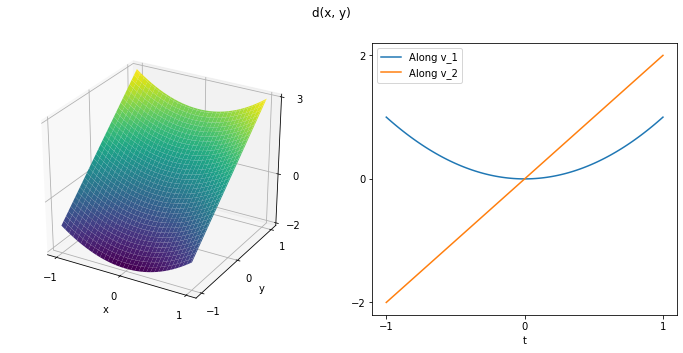

In [6]:
def d(x, y):
    return np.power(x, 2) + 2 * y


d_eigenvectors = [np.array([1.0, 0.0]), np.array([0.0, 1.0])]
answer('d', d, d_eigenvectors)

### Problem 1.2

$$
e(x, y) = \frac{1}{3} (y - x^2)^3
$$

(1)  Write expressions for the gradient and Hessian of the function at $\mathbf{x} = (x,y)$
Simplify your expressions as much as possible.
$$
\nabla e(\mathbf{x}) = \left[\begin{array}{c} -2x^5 + 4x^3y - 2xy^2 \\ x^4 - 2x^2y + y^2 \end{array}\right]
$$
$$
H_e(\mathbf{x}) = \left[\begin{array}{cc} -10x^4 + 12x^2y - 2y^2 & 4x^3 - 4xy \\ 4x^3 - 4xy & -2x^2 + 2y \end{array}\right]
$$

(2) Write exact numerical values for the gradient and Hessian of the function at $\mathbf{x_0} = (0,0)$
$$
\nabla e(\mathbf{x_0}) = \left[\begin{array}{c} 0 \\ 0 \end{array}\right]
\;\;\;\;\;\;\;\;
H_e(\mathbf{x_0}) = \left[\begin{array}{cc} 0 & 0 \\ 0 & 0 \end{array}\right]
$$

(3) Eigenvalues and eigenvectors of the Hessian at $\mathbf{x}_0$: 
$$
\lambda_1 = 0 \;,\;\lambda_2 = 0\; \;,\;
\mathbf{v}_1 = \left[\begin{array}{c} 1 \\ 0 \end{array}\right] \;,\;\;
\mathbf{v}_2 = \left[\begin{array}{c} 0 \\ 1 \end{array}\right]
$$

(4) The point $\mathbf{x}_0$ is an isolated saddle point because the gradient is zero at (0, 0) meaning we will have a minimum, maximum, or critical point. The second derivative test clarifies that is a critical point which means we know it is now a saddle point. We then check for isolation by taking small steps in the direction of $ \mathbf{v}_1 \;$ and $\mathbf{v}_2 \;$ giving us a value greater than or less than zero meaning our point is isolated.
$$
e(0,\delta ) = \frac{1}{3} (\delta -(0)^2)^3 = \frac{\delta^3}{3} \\
e(\epsilon, 0) = \frac{1}{3} ((0) -\epsilon^2)^3 = \frac{- \epsilon^6}{3}
$$

(5)


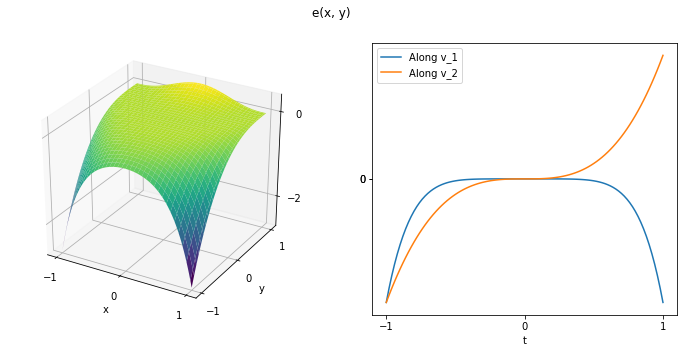

In [7]:
def e(x, y):
    return (1/3)*np.power((y-np.power(x,2)), 3)


e_eigenvectors = [np.array([1.0, 0.0]), np.array([0.0, 1.0])]
answer('e', e, e_eigenvectors)

### Problem 1.3

$$
f(x, y) = \frac{1}{2} x^2 y^2
$$

(1)  Write expressions for the gradient and Hessian of the function at $\mathbf{x} = (x,y)$
Simplify your expressions as much as possible.
$$
\nabla f(\mathbf{x}) = \left[\begin{array}{c} xy^2 \\ x^2y \end{array}\right]
\;\;\;\;\;\;\;\;
H_f(\mathbf{x}) = \left[\begin{array}{cc} y^2 & 2xy \\ 2xy & x^2 \end{array}\right]
$$

(2) Write exact numerical values for the gradient and Hessian of the function at $\mathbf{x_0} = (0,0)$
$$
\nabla f(\mathbf{x_0}) = \left[\begin{array}{c} 0 \\ 0 \end{array}\right]
\;\;\;\;\;\;\;\;
H_f(\mathbf{x_0}) = \left[\begin{array}{cc} 0 & 0 \\ 0 & 0 \end{array}\right]
$$

(3) Eigenvalues and eigenvectors of the Hessian at $\mathbf{x}_0$: 
$$
\lambda_1 = 0 \;,\;\lambda_2 = 0\; \;,\;
\mathbf{v}_1 = \left[\begin{array}{c} 1 \\ 0 \end{array}\right] \;,\;\;
\mathbf{v}_2 = \left[\begin{array}{c} 0 \\ 1 \end{array}\right]
$$

(4) The point $\mathbf{x}_0$ is a non-isolated minimum because the second derivative test comes back non-zero for the nearby points. Moreover by checking small steps in both eigenvector directions, we can confirm that the point is non-isolated since the nearby points are also zero. 
$$
f(0,\delta ) = \frac{1}{2} (0)^2 \delta^2 = 0 \\
f(\epsilon, 0) = \frac{1}{2} \epsilon^2 (0)^2 = 0
$$


(5)


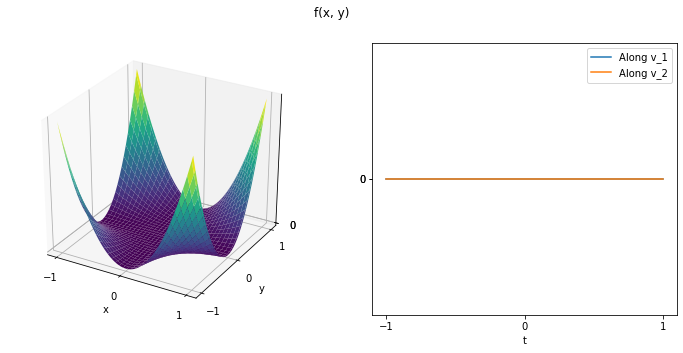

In [8]:
def f(x, y):
    return (1/2)*np.power(x,2)*np.power(y,2)


f_eigenvectors = [np.array([1.0, 0.0]), np.array([0.0, 1.0])]
answer('f', f, f_eigenvectors)

## Part 2: Fitting Sums of Functions

### Problem 2.1

The fourier sum must be a mix of sines and cosines because a even continuous function would not be fully represented using only sines which are odd. The necesity of the two is to have complete approximations of all functions.

### Problem 2.2

In [9]:
import numpy as np

def Fourier(k):
    if k % 2:
        return lambda x: np.sin(np.pi * (k + 1) * x)
    else:
        return lambda x: np.cos(np.pi * k * x)

In [10]:
"""
takes:
    
A Numpy array of  N  values  x0,…,xN−1 
A function basis with the same header format as Fourier
A positive integer  K  (the number of basis functions to use)
and computes the  N×K  matrix  A  defined above.
"""
def evaluate_basis(x, basis, K):
    A = np.array([])
    for i in range(K):
        A = np.concatenate((A, basis(i)(x)))   
    A = np.reshape(A, (K, len(x))).T
    return A

In [11]:
print(evaluate_basis(np.array([.1,.12,.7]), Fourier, 5))

[[ 1.          0.58778525  0.80901699  0.95105652  0.30901699]
 [ 1.          0.68454711  0.72896863  0.99802673  0.06279052]
 [ 1.         -0.95105652 -0.30901699  0.58778525 -0.80901699]]


### Problem 2.3

In [12]:
"""
analogous to Fourier, but for polynomial fitting.
"""
def polynomial(k):        
    return lambda x: np.power(x, k)

print(evaluate_basis(np.array([1,2,3]), polynomial, 5))

[[ 1.  1.  1.  1.  1.]
 [ 1.  2.  4.  8. 16.]
 [ 1.  3.  9. 27. 81.]]


### Problem 2.4

In [13]:
"""
takes

A dictionary T with keys 'x' and 'y' whose values specify a set of points on
 the plane
An integer K that specifies the number of basis functions to use
A function that when passed an integer  k  returns the function  bk . 
This argument has default value Fourier.

returns the vector  c^  of coefficients of the minimum-norm best-fit sum of 
K  functions from the given basis to the data in T.
"""
def fit(T, K, basis=Fourier):
    b = np.array(T['y'])
    x = np.array(T['x'])
    A = evaluate_basis(x, basis, K)
    c = np.linalg.lstsq(A, b, rcond=None)[0]
    return c


[ 8.33333333 -8.          1.66666667]
       2
1.667 x - 8 x + 8.333


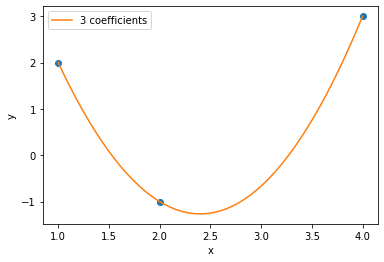

In [14]:
T_exact = {'x': [1, 2, 4], 'y': [2, -1, 3]}
print(fit(T_exact, 3, polynomial))
xpoint = np.array([1, 2, 4])
ypoint = np.array([2, -1, 3])
poly = np.poly1d(np.flipud(fit(T_exact, 3, polynomial)))
print(poly)
x = np.linspace(1, 4)
y = poly(x)
fig = plt.figure()
plt.plot(xpoint, ypoint, "o")
plt.plot(x, y, label = "3 coefficients")
#fig.suptitle('{}(x, y)'.format(name))
plt.title('')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

### Problem 2.5

(-1.5, 5.0)

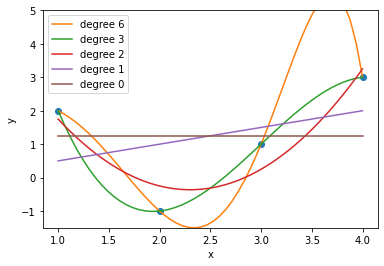

In [15]:
T_over = {'x': [1, 2, 3, 4], 'y': [2, -1, 1, 3]}
xpoint = np.array([1, 2, 3, 4])
ypoint = np.array([2, -1, 1, 3])
poly_6 = np.poly1d(np.flipud(fit(T_over, 7, polynomial)))
#print(poly_6)
x_6 = np.linspace(1, 4)
y_6 = poly_6(x_6)
poly_3 = np.poly1d(np.flipud(fit(T_over, 4, polynomial)))
x_3 = np.linspace(1, 4)
y_3 = poly_3(x_3)
poly_2 = np.poly1d(np.flipud(fit(T_over, 3, polynomial)))
x_2 = np.linspace(1, 4)
y_2 = poly_2(x_2)
poly_1 = np.poly1d(np.flipud(fit(T_over, 2, polynomial)))
x_1 = np.linspace(1, 4)
y_1 = poly_1(x_1)
poly_0 = np.poly1d(np.flipud(fit(T_over, 1, polynomial)))
x_0 = np.linspace(1, 4)
y_0 = poly_0(x_0)
plt.plot(xpoint, ypoint, "o")
plt.plot(x_6, y_6, label="degree 6")
plt.plot(x_3, y_3, label="degree 3")
plt.plot(x_2, y_2, label="degree 2")
plt.plot(x_1, y_1, label="degree 1")
plt.plot(x_0, y_0, label="degree 0")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.ylim(-1.5, 5)

### Problem 2.6

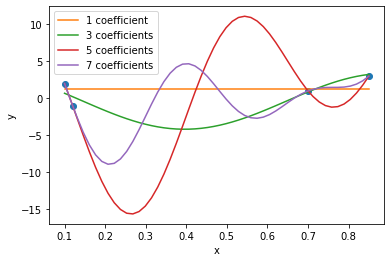

In [16]:
T_f = {'x': [.1, .12, .7, .85], 'y': [2, -1, 1, 3]}
#print(fit(T_f, 7, Fourier))
xpoint = np.array([.1, .12, .7, .85])
ypoint = np.array([2, -1, 1, 3])
x = np.linspace(.1, .85)
series = 1.25+x-x
series_3 = -.39319341 -2.29989441*np.sin(np.pi*2*x) + 3.0004177*np.cos(np.pi*2*x)
series_5 = 1.11570152 -7.16568795*np.sin(np.pi*2*x) +.84716311*np.cos(np.pi*2*x) + 1.58521016*np.sin(np.pi*4*x) + 9.39492143*np.cos(np.pi*4*x)
series_7 = 1.33635977 -2.30191651*np.sin(np.pi*2*x) +2.94696879*np.cos(np.pi*2*x) -2.97494783*np.sin(np.pi*4*x) +4.3009445*np.cos(np.pi*4*x) +2.13762425*np.sin(np.pi*6*x) +2.91312067*np.cos(np.pi*6*x)
plt.plot(xpoint, ypoint, "o")
plt.plot(x, series, label="1 coefficient")
plt.plot(x, series_3, label = "3 coefficients")
plt.plot(x, series_5, label = "5 coefficients")
plt.plot(x, series_7, label = "7 coefficients")
#plt.plot(x, Rseries_5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## Part 3: Probability

### Problem 3.1

The elements are not independent since P(A)* P(B) does not equal P(A & B).
$$
    p(x) : 
    \begin{array}{ccccc}
        .16 & .17 & .11 & .22 & .34 \\\hline
        x_1 & x_2 & x_3 & x_4 & x_5
    \end{array}
    \;\;\;\text{and}\;\;\;
    p(y) : 
    \begin{array}{r|c}
        y_1 & .26 \\
        y_2 & .47 \\
        y_3 & .27
    \end{array}
$$

### Problem 3.2

$$
\begin{eqnarray*}
    p(x|y) &:& 
    \begin{array}{r|ccccc}
        y_1 & .0384 & .0769 & .1154 & .3846 & .3846 \\
        y_2 & .1063 & .2128 & .1063 & .1489 & .4255 \\
        y_3 & .3704 & .1852 & .1114 & .1852 & .1481 \\\hline
            & x_1  & x_2  & x_3  & x_4  & x_5
    \end{array} \\
    \mbox{} \\
    p(y|x) &:& 
    \begin{array}{r|ccccc}
        y_1 & .6625 & .1176 & .2727 & .4545 & .2941 \\
        y_2 & .3125 & .5882 & .4545 & .3181 & .5882 \\
        y_3 & .6250 & .2941 & .2727 & .2273 & .1176 \\\hline
            & x_1  & x_2  & x_3  & x_4  & x_5
    \end{array}
\end{eqnarray*}
$$

### Problem 3.3

(This problem is from _Mathematics for Machine Learning_ by M. P. Deisenroth, A. A. Faisal, and C. S. Ong, Cambridge University Press, 2020. If you are rusty on the prerequisites, this may be a good book for you.)

Let $H$ be the event that the coin comes up heads, which corresponds to the fruit coming from bag 1. Similarly, let $T$ be the event that the coin comes up tails (the fruit comes from bag 2). Finally, let $M$ be the event "a mango is drawn" and $A$ be the event "an apple is drawn."

The problem asks to compute $p(T|M)$, the probability that the fruit comes from bag 2 given that it is a mango.

We have

$$
p(H) = \frac{3}{5} \;\;\;\text{,}\;\;\;
p(T) = 1 - p(H) = \frac{2}{5}
$$

and, given the compositions of the contents in the two bags,

$$
\begin{eqnarray*}
    p(M|H) = \frac{2}{3} &\;\text{,}\;\;\;&
    p(A|H) = \frac{1}{3} \;\text{,}\\
    \mbox{} \\
    p(M|T) = \frac{1}{2} &\;\text{,}\;\;\;&
    p(A|T) = \frac{1}{2} \;.
\end{eqnarray*}
$$

The probability that the mango was picked from bag 2 is $ \frac{1}{3} $ because of the independence of the events of flipping a biased coin and picking a fruit from a particular bag.
$$
p(H) = \frac{3}{5} \\
p(B = B_2|M) = \frac{p(M)}{p(M and B_2)} \\
p(A|B) = \frac{p(A n B)}{p(B)} \\
p(M) = \frac{3}{5} * \frac{2}{3} + \frac{2}{5} * \frac{1}{2} = \frac{3}{5} \\
p(M and B_2) = \frac{2}{5} * \frac{1}{2} = \frac{1}{3}
$$